# PHYS5200 Experiment 4 - Gyroscopes

### Imports

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Section 1 Moment of Inertia of Weighted Aluminium Disc

### Importing Data

In [81]:
mass_error = 0.01 #grams
length_error = 0.02 #cm

masses = {
    "mass_1": np.array([96.6,96.39,96.59]), #grams
    "mass_2": np.array([97.11,97.1,97.11]), #grams
    "masses_with_screws": np.array([197.06,197.06,197.05]), #grams
    "screw_mass": np.array([3.34,3.34,3.35]) #grams
}

R_wt = np.array([16.1,16.2,16.3]) # Distance from mass to center axis in cm
disc_period_with_masses = np.array([1.19,1.29,1.22,1.25,1.22,1.22,1.19,1.16,1.22,1.25]) # seconds


In [82]:
mean_disc_period_with_masses = np.mean(disc_period_with_masses)
mean_R_wt = np.mean(R_wt)
mean_mass_with_screws = np.mean(masses["masses_with_screws"])

### Convert Data to SI Units

In [83]:
np.mean(masses["masses_with_screws"])

np.float64(197.0566666666667)

In [84]:
mass_error_si = mass_error/1000 #kg
length_error_si = length_error/100 #m

masses_si = {
    "mass_1": masses["mass_1"]/1000, #kg
    "mass_2": masses["mass_2"]/1000, #kg
    "masses_with_screws": masses["masses_with_screws"]/1000, #kg
    "screw_mass": masses["screw_mass"]/1000 #kg
}

R_wt_si = R_wt/100



### Errors

- The error in the mass measurements is $0.01$ grams according to the scale
- The error in the length measurements is $0.02$ cm


To find the error in the time period can be found by taking the SEM

$$SEM = \frac{\sigma}{\sqrt{n}}$$

- Where $\sigma$ is the standard deviation

$$\sigma^2 = \frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})^2$$


In [85]:
def standard_deviation(values:np.array):
    return np.sqrt(np.sum((values - np.mean(values))**2) / (values.size -1))

def standard_error_in_mean(st_dev,count):
    return st_dev / np.sqrt(count)

In [86]:
np.mean(disc_period_with_masses)

np.float64(1.2209999999999999)

In [87]:
disc_period_error = round(standard_error_in_mean(standard_deviation(disc_period_with_masses),disc_period_with_masses.size),3) #seconds
print(f"The disc period error is {disc_period_error} seconds")


The disc period error is 0.012 seconds


#### Calculate the Moment of Inertia of the Aluminium Disc

$$I_{Al} = \frac{M_{wt}R_{wt}g\Delta t^2}{4\pi^2} - M_{wt}R_{wt}^2$$

Where:

- $I_{Al}$ is the moment of inertia of the Aluminum Disc
- $M_{wt}$ is the mass of the weights
- $R_{wt}$ is the distance from the weights to the axis of rotation
- $\Delta t$ is the time period of oscillation

In [88]:
def calculate_aluminum_disc_moment_inertia(weight_mass:float,distance_to_masses:float,time_period:float,g:float = 9.81)->float:
    return ((weight_mass*distance_to_masses*g*(time_period**2))/(4*(np.pi**2))) - (weight_mass*(distance_to_masses**2))

aluminum_disc_moment_inertia_value = calculate_aluminum_disc_moment_inertia(np.mean(masses_si['masses_with_screws']),np.mean(R_wt_si),np.mean(disc_period_with_masses))

### Calculating Errors in the Moment of Inertia

$$\frac{\partial f}{\partial M_{wt}} = \frac{R_{wt}g\Delta t^2}{4\pi^2} - R_{wt}^2$$

$$\frac{\partial f}{\partial R_{wt}} = \frac{M_{wt}g\Delta t^2}{4\pi^2} - 2M_{wt}R_{wt}$$

$$\frac{\partial f}{\partial \Delta t} = \frac{2M_{wt}R_{wt}g\Delta t}{4\pi^2}$$


Error in moment of inertia is

$$I_{Al}^2 = \sum_{i=1}^{n} (\vert \frac{\partial f}{\partial x_i}\vert y_i)^2$$

- Where $x_i$ is the parameter 
- $y_i$ is it's associated uncertainty
- $I_{Al}$ is the error in the Aluminum disc's moment of inertia

In [89]:
def partial_m(distance_to_center, time_period,g=9.81):
    return np.abs(((distance_to_center * g * (time_period**2))/ (4 * (np.pi**2))) - (distance_to_center**2))

def partial_r(weight_mass,distance_to_center,time_period,g=9.81):
    return np.abs((weight_mass * g * (time_period**2)) / (4 * (np.pi**2))) - (2*weight_mass * distance_to_center)

def partial_t(weight_mass,distance_to_center,time_period,g=9.81):
    return  np.abs((2*weight_mass*distance_to_center*time_period*g)/(4 * (np.pi **2)))


moment_of_inertia_error = np.sqrt(np.sum(np.array([(partial_m(length_error_si,disc_period_error))**2,(partial_r(mass_error_si,length_error_si,disc_period_error))**2,(partial_t(mass_error_si,length_error_si,disc_period_error))**2])))


# moment_of_inertia_error = np.sqrt(
#     np.sum(
#         np.array(
#             [
#                 partial_m()
#             ]
#         )
#     )
# )

In [90]:
cgs_aluminum_disc_moment_of_inertia = calculate_aluminum_disc_moment_inertia(np.mean(masses['masses_with_screws']),np.mean(R_wt),np.mean(disc_period_with_masses),981)
print(mean_disc_period_with_masses)
print(mean_mass_with_screws)
print(mean_R_wt)

1.2209999999999999
197.0566666666667
16.2


In [91]:
cgs_moment_of_inertia_aluminum_disc_masses_error = np.sqrt(
    np.sum(
        np.array(
            [
                (partial_m(mean_R_wt,mean_disc_period_with_masses,981)* mass_error)**2,
                (partial_r(mean_mass_with_screws,mean_R_wt,mean_disc_period_with_masses,981)*length_error)**2,
                (partial_t(mean_mass_with_screws,mean_R_wt,mean_disc_period_with_masses,981)*disc_period_error)**2
            ]
        )
    )
)

In [92]:
0.0005047279969492183

0.0005047279969492183

In [93]:
print(f"The moment of inertia (cgs) for the aluminum disc is {cgs_aluminum_disc_moment_of_inertia} ± {cgs_moment_of_inertia_aluminum_disc_masses_error:.4g} gcm^2")

The moment of inertia (cgs) for the aluminum disc is 66546.86392025521 ± 2325 gcm^2


In [94]:
print(f"The moment of inertia for the aluminum disc is {aluminum_disc_moment_inertia_value} ± {moment_of_inertia_error} kg m^2")

The moment of inertia for the aluminum disc is 0.006654686392025522 ± 3.304481645725007e-08 kg m^2


## Section 1.2 

### Importing Data

In [95]:
mass_of_aluminum_disc = 772.92 #grams
aluminum_disc_mass_error = 0.03 #grams

radius_of_aluminum_disc = np.array([17,16.9,17.1,17.1]) #cm
length_error = 0.02 #cm

distances_from_center = {
    "a_1": np.array([16.3,16.2,16.1,16.1]), #cm
    "a_2": np.array([12.1,12.2,12.2,12.1]), #cm
    "a_3": np.array([8.2,8.1,8.1,8.1]), #cm
    "a_4": np.array([4.1,4.1,4,4.1]), #cm
    "a_5": np.array([2.2,2.1,2,2.1]), #cm
    "a_6": np.array([6.1,6.1,6,6.2]), #cm
    "a_7": np.array([10.1,10,10.1,10]), #cm
    "a_8": np.array([14.1,14.1,14,14.1]) #cm
}

pendulum_times_at_different_distances = {
    "dt_1": np.array([0.97,0.93,1.03,0.88,0.97,0.88,0.85,1.00,0.78,0.88]), #seconds
    "dt_2": np.array([0.84,0.85,0.78,0.88,0.90,0.8 ,0.78,0.88,0.81,0.81]), #seconds
    "dt_3": np.array([0.84,0.87,0.87,0.97,0.90,0.88,0.88,0.87,1.03,0.94]), #seconds
    "dt_4": np.array([0.96,1.09,1.10,1.09,1.10,1.09,1.13,1.12,1.10,1.19]), #seconds
    "dt_5": np.array([1.66,1.44,1.29,1.43,1.34,1.41,1.44,1.31,1.46,1.56]), #seconds
    "dt_6": np.array([0.88,0.97,0.84,0.94,0.85,0.94,0.94,0.81,0.84,0.88]), #seconds
    "dt_7": np.array([0.87,0.88,0.94,0.93,0.88,0.84,0.78,0.85,0.81,0.85]), #seconds
    "dt_8": np.array([0.78,0.84,0.81,0.79,0.81,0.88,0.75,0.90,0.88,0.78])  #seconds
    
}

#### Convert Data to SI

In [96]:
mass_of_aluminum_disc_si = mass_of_aluminum_disc/1000 #kg
aluminum_disc_mass_error_si = aluminum_disc_mass_error/1000 #kg

radius_of_aluminum_disc_si = radius_of_aluminum_disc/100 #m

distances_from_center_si = {
    "a_1": distances_from_center["a_1"]/100, #m
    "a_2": distances_from_center["a_2"]/100, #m
    "a_3": distances_from_center["a_3"]/100, #m
    "a_4": distances_from_center["a_4"]/100, #m
    "a_5": distances_from_center["a_5"]/100, #m
    "a_6": distances_from_center["a_6"]/100, #m
    "a_7": distances_from_center["a_7"]/100, #m
    "a_8": distances_from_center["a_8"]/100  #m
}

### Errors



### Moment of Inertia of Aluminum Disc at axes not passing through the center of gravity

Using the Parallel Axis Theorem the moment of inertia about any axis parallel to the center of gravity can be calculated by

$$I_{Al}^{\prime} = I_{Al} + mr^2$$

- Where $I_{Al}$ is the moment of inertia about an axis passing through the center of gravity
- $I_{Al}^{\prime}$ is the moment of inertia about a parallel axis
- $m$ is the mass of the aluminum disc
- $r$ is the perpendicular distance from the center of gravity to the axis about which the moment of inertia will be calculated



These values will then be compared to a calculated value, modelling the aluminum disc as a cylinder.

In this case, the moment of inertia can be calculated as follows:

$$I_{Al} = \frac{1}{2}M_{Al}R_{Al}^2$$

- Where $I_{Al}$ is the moment of inertia of the aluminum disc
- $M_{Al}$ is the mass of the aluminum disc
- $R_{Al}$ is the radius of the aluminum disc




The moment of inertia through the center of gravity can be calculated using:

assuming that the density of the aluminum disc is constant 
- h is the thickness of the disc
- R is the radius

$$I_{Al} = \int_{0}^{h}\int_{0}^{R}\int_{0}^{2\pi}\rho {r}^2 dV $$

In cylindrical coordinates, centered about the center of the disc

$$I_{Al} = \rho \int_{0}^{h}\int_{0}^{R}\int_{0}^{2\pi}  {r}^3drd\theta dz $$


Then $$I_{Al} = \frac{\pi\rho R^4 h}{2}$$

- This can be rewritten as $$I_{Al} = \frac{1}{2}MR^2$$ which is the standard equation for the moment of inertia for a solid cylinder about an axis passing through its center


#### As Written in the Assignment Document
$a$ is the perpendicular distance from the center of gravity to the axis of rotation

This means that when $a = 0$ the moment of inertia about the center of gravity can be calculated
 - The moment of inertia for the Aluminum disc about the center of gravity can be calculated using:


 $$I_{Al} = mga \frac{{\Delta t}^2}{4 \pi^2} - ma^2$$



#### Defining Functions

##### Function defining the Parallel Axis Theorem

In [97]:
def parallel_axis(moment_of_inertia, mass, distance_between_axes):
    return moment_of_inertia + (mass*(distance_between_axes**2))

##### Function to calculate the Moment of Inertia 

$$I = mga \frac{{\Delta t}^2}{4 \pi^2} - ma^2$$

- Where $a$ is the perpendicular distance to the center of gravity
- $m$ is the mass
- $g$ is $9.81$
- $\Delta t$ is the time period for the physical pendulum

In [98]:
def calculate_moment_of_inertia(mass,perpendicular_distance,time_period,gravity=9.81):
    return (mass*gravity*perpendicular_distance)*(time_period/(2*np.pi))**2 - (mass*perpendicular_distance**2)

##### Function for calculating the moment of inertia of a cylinder

In [99]:
def cylinder_moment_of_inertia(mass,radius):
    return 0.5 * mass * (radius**2)

### Calculating the Moment of Inertia of a Physical Pendulum about an axis passing through the center of gravity

In [100]:
aluminum_disc_moment_of_inertia_different_axes = {
    "a_1": calculate_moment_of_inertia(mass_of_aluminum_disc,np.mean(distances_from_center["a_1"]),np.mean(pendulum_times_at_different_distances["dt_1"]),981), #kg m^2
    "a_2": calculate_moment_of_inertia(mass_of_aluminum_disc,np.mean(distances_from_center["a_2"]),np.mean(pendulum_times_at_different_distances["dt_2"]),981), #kg m^2
    "a_3": calculate_moment_of_inertia(mass_of_aluminum_disc,np.mean(distances_from_center["a_3"]),np.mean(pendulum_times_at_different_distances["dt_3"]),981), #kg m^2
    "a_4": calculate_moment_of_inertia(mass_of_aluminum_disc,np.mean(distances_from_center["a_4"]),np.mean(pendulum_times_at_different_distances["dt_4"]),981), #kg m^2
    "a_5": calculate_moment_of_inertia(mass_of_aluminum_disc,np.mean(distances_from_center["a_5"]),np.mean(pendulum_times_at_different_distances["dt_5"]),981), #kg m^2
    "a_6": calculate_moment_of_inertia(mass_of_aluminum_disc,np.mean(distances_from_center["a_6"]),np.mean(pendulum_times_at_different_distances["dt_6"]),981), #kg m^2
    "a_7": calculate_moment_of_inertia(mass_of_aluminum_disc,np.mean(distances_from_center["a_7"]),np.mean(pendulum_times_at_different_distances["dt_7"]),981), #kg m^2
    "a_8": calculate_moment_of_inertia(mass_of_aluminum_disc,np.mean(distances_from_center["a_8"]),np.mean(pendulum_times_at_different_distances["dt_8"]),981)  #kg m^2
}


In [101]:
np.mean(pendulum_times_at_different_distances["dt_1"])

np.float64(0.917)

## Fix Data

In [102]:
x_points_distances = []
y_points_moment_of_inertia = []

for distance in aluminum_disc_moment_of_inertia_different_axes:

    x_points_distances.append(np.mean(distances_from_center[distance]))
    y_points_moment_of_inertia.append(np.mean(aluminum_disc_moment_of_inertia_different_axes[distance]))

### Data plot

Seems to generally match a polynomial of degree 2

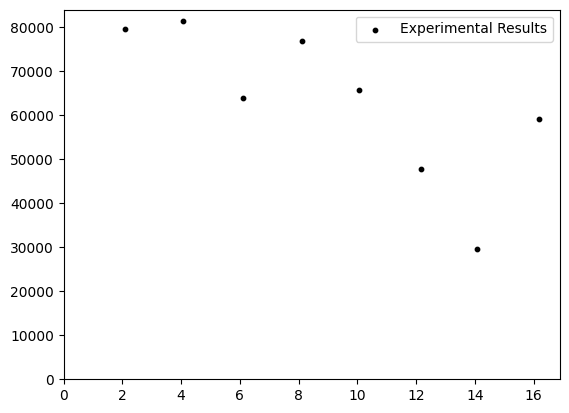

In [103]:
plt.figure()
plt.scatter(x_points_distances,y_points_moment_of_inertia,color='black',s=10,label="Experimental Results")
plt.legend()
plt.ylim(0,)
plt.xlim(0,)
plt.show()

In [104]:
x_points_distances

[np.float64(16.175),
 np.float64(12.15),
 np.float64(8.125),
 np.float64(4.074999999999999),
 np.float64(2.1),
 np.float64(6.1),
 np.float64(10.05),
 np.float64(14.075000000000001)]

## Fit Data to Polynomial of Degree 2

In [105]:
coeff = np.polynomial.polynomial.polyfit(x_points_distances,y_points_moment_of_inertia,2)
fit = np.polynomial.Polynomial(coeff)

fit_x = np.linspace(0,max(x_points_distances),10000)
fit_y = np.linspace(-max(y_points_moment_of_inertia),max(y_points_moment_of_inertia),10000)

Mean Squared Error = 1.13e+08


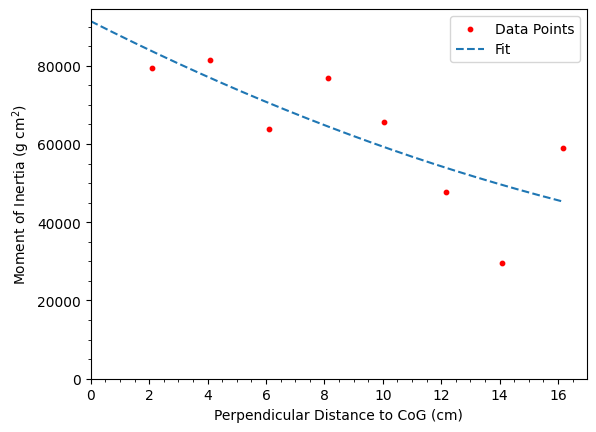

In [106]:
print(f"Mean Squared Error = {np.mean([np.array(np.array(y_points_moment_of_inertia) - fit(np.array(x_points_distances)))**2]):.2e}")
plt.figure()
plt.scatter(x_points_distances,y_points_moment_of_inertia,color='red',s=10,label="Data Points")
plt.xlabel("Perpendicular Distance to CoG (cm)")
plt.ylabel("Moment of Inertia (g cm$^2$)")
plt.plot(fit_x,fit(fit_x),label="Fit",ls='dashed')
#plt.figtext(0,0,f"Mean Squared Error = {np.mean([np.array(np.array(y_points_moment_of_inertia) - fit(np.array(x_points_distances)))**2]):.2e}")
plt.xlim(0,)
plt.ylim(0,)
plt.minorticks_on()
plt.legend()
plt.show()

### Using The Fitted Model the Value for the Moment of Inertia at the Center of Gravity can be Predicted

In [107]:
print(f"Moment of Inertia at CoG = {fit(0):.2e}")

Moment of Inertia at CoG = 9.14e+04


## Doing a Plot with the two outliers removed


Need to remove the 0.06 and the 0.16 data points

In [108]:
print(f"{x_points_distances = }")
print(f"{y_points_moment_of_inertia = }")

x_points_distances = [np.float64(16.175), np.float64(12.15), np.float64(8.125), np.float64(4.074999999999999), np.float64(2.1), np.float64(6.1), np.float64(10.05), np.float64(14.075000000000001)]
y_points_moment_of_inertia = [np.float64(59012.6986154824), np.float64(47823.197094166666), np.float64(76785.05865109767), np.float64(81350.81835105941), np.float64(79530.9228704828), np.float64(63832.43730967191), np.float64(65690.96462662568), np.float64(29537.004354893084)]


In [109]:
data_points = list(zip(x_points_distances,y_points_moment_of_inertia))
data_points = data_points[1::]
data_points.pop(4)
data_points


[(np.float64(12.15), np.float64(47823.197094166666)),
 (np.float64(8.125), np.float64(76785.05865109767)),
 (np.float64(4.074999999999999), np.float64(81350.81835105941)),
 (np.float64(2.1), np.float64(79530.9228704828)),
 (np.float64(10.05), np.float64(65690.96462662568)),
 (np.float64(14.075000000000001), np.float64(29537.004354893084))]

### Plot the Graph

In [110]:
data_transpose = np.array(data_points).transpose()
data_transpose[1]

array([47823.19709417, 76785.0586511 , 81350.81835106, 79530.92287048,
       65690.96462663, 29537.00435489])

In [111]:
data_transpose[0]

array([12.15 ,  8.125,  4.075,  2.1  , 10.05 , 14.075])

In [112]:
data = pd.DataFrame(data_transpose)
data
np.mean(np.array(data.sem()))

np.float64(31722.282579027105)

In [113]:
fit_coeff = np.polynomial.polynomial.polyfit(data_transpose[0],data_transpose[1],2)
test_fit = np.polynomial.polynomial.Polynomial(fit_coeff)

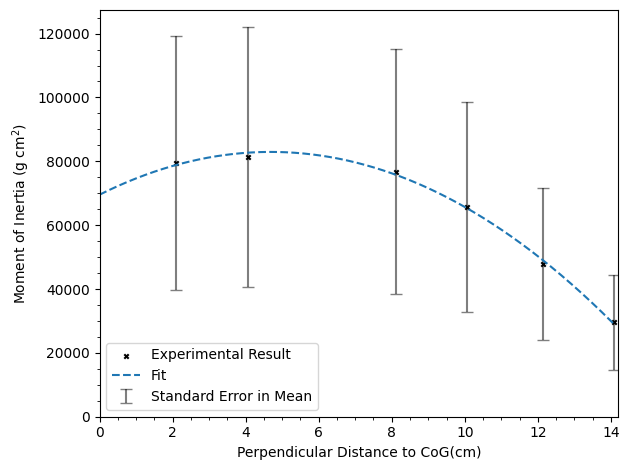

In [114]:
fig, ax = plt.subplots()
ax.scatter(data_transpose[0],data_transpose[1],c="black",label="Experimental Result",marker="x",s=10,)
ax.plot(np.linspace(0,data_transpose[0].max(),10000),test_fit(np.linspace(0,data_transpose[0].max(),10000)),ls="dashed",label="Fit")
ax.errorbar(data_transpose[0],data_transpose[1],np.array(data.sem()),ls='none',capsize=4,zorder=-999,color='black',alpha=0.5,label="Standard Error in Mean")
ax.legend()
ax.set_xlabel("Perpendicular Distance to CoG(cm)")
ax.set_ylabel("Moment of Inertia (g cm$^2$)")
ax.minorticks_on()
ax.set_ylim(0,)
ax.set_xlim(0,14.2)
#ax.set_aspect()
fig.tight_layout()
plt.show()

In [115]:
print(f"{test_fit(0) = }")

test_fit(0) = np.float64(69529.68906282618)


##### Define Functions Parallel Axis Theorem Uncertainty

$$I = mgd_{\perp} \frac{{\Delta t}^2}{4 \pi^2} - md_{\perp}^2$$

$$\frac{\partial I}{\partial m}= \frac{gd_{\perp}\Delta t^2}{4\pi^2} - d_{\perp}^2 $$

$$\frac{\partial I}{\partial d_{\perp}}= \frac{mg\Delta t^2}{4\pi^2} - 2md_{\perp}$$

$$\frac{\partial I}{\partial \Delta t} = \frac{2mgd_{\perp}\Delta t}{4\pi^2}$$



$$\Delta I^2 = \sum_{i=0}^n (\vert \frac{\partial I}{\partial x_i}\vert y_i)^2$$

Where:
- $\frac{\partial I}{\partial x_i}$ is the partial derivative of $I$ with respect to $x_i$
- $y_i$ is the associated uncertainty

In [116]:
def partial_m_pat(d_perp,delta_t,g=9.81):
    return ((g * d_perp * (delta_t**2) )/ (4 * np.pi**2)) - (d_perp**2)

def partial_d_perp_pat(mass,d_perp,delta_t,g = 9.81):
    return ((mass * g * (delta_t**2))/(4*np.pi**2)) - (2*mass*d_perp)

def partial_delta_t_pat(mass,d_perp,delta_t,g = 9.81):
    return (2 * mass * g * d_perp * delta_t)/(4*np.pi**2)

In [117]:
df = pd.DataFrame(pendulum_times_at_different_distances)
pat_delta_t_error = np.mean(df.sem())

In [118]:
perpendicular_distance_error = 0.002 #cm
mean_perp_dist = np.mean(data_transpose[0])
mean_delta_t_pat = np.mean(pd.DataFrame(pendulum_times_at_different_distances).mean())


In [119]:
parallel_axis_theorem_moment_of_inertia_uncertainty = np.sqrt(
    np.sum(
        np.array(
            [
                (partial_m_pat(d_perp=mean_perp_dist,delta_t=mean_delta_t_pat,g=981)*mass_error)**2,
                (partial_d_perp_pat(mass_of_aluminum_disc,mean_perp_dist,mean_delta_t_pat,g=981)*perpendicular_distance_error)**2,
                (partial_delta_t_pat(mass=mass_error,d_perp=mean_perp_dist,delta_t=mean_delta_t_pat,g=981) * pat_delta_t_error)**2
            ]
        )
    )
)

In [120]:
f"The moment of inertia using the parallel axis theorem is {test_fit(0):.4g} plus/minus {parallel_axis_theorem_moment_of_inertia_uncertainty:.4g}"

'The moment of inertia using the parallel axis theorem is 6.953e+04 plus/minus 10.16'

# Maybe do SEM for error?

### 2.1 Gyroscope Moment of Inertia

The moment of inertia for the gyroscope can be calculated in the same way as the one for the aluminum disc: by modelling it as a physical pendulum


$$I_{Gyro} = \frac{M_{wt}R_{wt}g\Delta t^2}{4\pi^2} - M_{wt}R_{wt}^2$$


Where:

- $I_{Gyro}$ is the moment of inertia of the Gyroscope
- $M_{wt}$ is the mass of the weights
- $R_{wt}$ is the distance from the weights to the axis of rotation
- $\Delta t$ is the time period of oscillation




In [121]:
gyroscope_distance_to_axis = np.mean([24.7,25,24.5,24.6]) #cm

gyroscope_delta_t = np.mean([
    1.787+2.001,
    2.058+1.463,
    2.066+1.444,
    2.034+1.483,
    2.050+1.460,
    2.017+1.501,
    2.038+1.475,
    2.021+1.499,
    2.020+1.501,
    2.006+1.522
]) #s
gyroscope_delta_t_error = 0.001 #s

gyroscope_center_of_gravity = np.mean([
    5.53-1.53,
    5.52 - 1.52
]) #cm

gyroscope_center_of_gravity_error = 0.002 #cm

gyroscope_mass = 3150 #g
gyroscope_mass_error = 100 #g

In [122]:
gyroscope_center_of_gravity

np.float64(4.0)

In [123]:
Gyroscope_moment_of_inertia = calculate_aluminum_disc_moment_inertia(mean_mass_with_screws,gyroscope_distance_to_axis,gyroscope_delta_t,981)

Gyroscope_moment_of_inertia_error = np.sqrt(
    np.sum(
        np.array(
            [
                (partial_m(gyroscope_distance_to_axis,gyroscope_delta_t,981) * mass_error)**2,
                (partial_r(mean_mass_with_screws,gyroscope_distance_to_axis,gyroscope_delta_t,981) * length_error)**2,
                (partial_t(mean_mass_with_screws,gyroscope_distance_to_axis,gyroscope_delta_t,981) * gyroscope_delta_t_error)**2
            ]
        )
    )
)
print(f"The Gyroscope's Moment of Inertia is {Gyroscope_moment_of_inertia} plus/minus {Gyroscope_moment_of_inertia_error:.4g}")

The Gyroscope's Moment of Inertia is 1399386.5769662457 plus/minus 1346


### 2.3 Precession


$$\omega_P = \frac{mgd}{I\omega}$$


Where:
- $\omega_P$ is the angular frequency of precession
- $m$ is the mass of the gyroscope
- $g$ is the acceleration due to gravity 
- $d$ is the distance from the center of gravity
- $I$ is the moment of inertia
- $\omega$ is the angular frequency of gyroscope rotation

The Gyroscope has 18 spokes (equally spaced). Therefore $\Delta t_{rot}$ is the same as the duration between two spokes, multiplied by 18. Or, the duration elapsed over any 18 spokes.

So that means that $$\omega = \frac{2\pi}{\Delta t_{rot}}$$


To determine whether this relationship is sufficient, the time periods for the precession were measured:

$$\omega_P = \frac{2\pi}{\Delta t_P}$$







#### Define Functions

In [124]:
def angular_freq(time_period):
    return np.pi * 2 / time_period

def relation_angular_precession_freq(gyroscope_mass,distance_to_CoG,moment_of_inertia,rotation_angular_freq,g=9.81):
    return (gyroscope_mass*distance_to_CoG*g)/(moment_of_inertia * rotation_angular_freq)

#### Input Data

In [125]:
gyro_distances_from_axis = np.abs(np.array([7.9,6.02,3.41,9.52,1.91,7.72])-gyroscope_center_of_gravity)

gyro_rotation_time_periods = {
    1: np.sum([0.044,0.043,0.044,0.043,0.044,0.044,0.045,0.044,0.045,0.045,0.045,0.044,0.045,0.044,0.046,0.045,0.044,0.045]),
    2: np.sum([0.036,0.036,0.036,0.037,0.036,0.037,0.036,0.037,0.037,0.037,0.036,0.038,0.036,0.037,0.037,0.037,0.036]),#Missed One Data Point Here, so it isn't a full rotation
    3: np.sum([0.036,0.037,0.036,0.037,0.036,0.037,0.035,0.036,0.035,0.036,0.036,0.036,0.036,0.036,0.035,0.036,0.035,0.036]),
    4: np.sum([0.036,0.035,0.035,0.035,0.035,0.036,0.035,0.035,0.035,0.032,0.003,0.035,0.036,0.036,0.037,0.036,0.037,0.035]),
    5: np.sum([0.034,0.035,0.034,0.035,0.035,0.035,0.035,0.035,0.035,0.034,0.034,0.036,0.034,0.035,0.034,0.035,0.034,0.034]),
    6: np.mean(
        np.array(
            [
                np.sum([0.036,0.038,0.036,0.038,0.037,0.037,0.037,0.038,0.037,0.038,0.036,0.037,0.037,0.037,0.036,0.038,0.037]),
                np.sum([0.030,0.029,0.029,0.029,0.027,0.002,0.029,0.003,0.029,0.029,0.029,0.029,0.028,0.029,0.028,0.028,0.028])
            ]
            )
            )
}

gyro_precession_time_periods = {
    1: 9.94,
    2: 51.28,
    3: 12.78,
    4: 6.43,
    5: 7.62,
    6: np.mean([12.37,16.15])

}


#### Calculation of Precession Freq using the time period

In [126]:
gyro_precession_t = np.array(list(gyro_precession_time_periods.values()))
gyro_precession_calculated_freq = angular_freq(gyro_precession_t)
gyro_precession_calculated_freq

array([0.6321112 , 0.12252701, 0.49164204, 0.97716723, 0.824565  ,
       0.44061608])

#### Calculation of Precession Frequency using

$$\omega_P = \frac{mgd}{I\omega}$$

In [127]:
gyro_rot_time_period = np.array(list(gyro_rotation_time_periods.values()))
gyro_rot_angular_frequency = angular_freq(gyro_rot_time_period)
print(f" Angular frequencies of gyroscope rotation = {gyro_rot_angular_frequency}")
relation_angular_precession_frequency_value = relation_angular_precession_freq(
    gyroscope_mass=gyroscope_mass,
    distance_to_CoG= np.abs(gyro_distances_from_axis),
    moment_of_inertia=Gyroscope_moment_of_inertia,
    rotation_angular_freq=gyro_rot_angular_frequency,
    g=981
)
print(f"Angular Frequency of Precession from equation = {relation_angular_precession_frequency_value}")
print(f"Gyroscope Precession Angular Frequency from time period = {gyro_precession_calculated_freq}")

 Angular frequencies of gyroscope rotation = [ 7.8638114  10.1015841   9.71126013 10.40262468 10.08536967 11.79940903]
Angular Frequency of Precession from equation = [1.09514941 0.44157425 0.13415853 1.17175821 0.45761086 0.69618481]
Gyroscope Precession Angular Frequency from time period = [0.6321112  0.12252701 0.49164204 0.97716723 0.824565   0.44061608]


### Errors in Calc



In [128]:
def precession_partial_m(distance_from_CoG,moment_of_inertia,rotation_angular_freq,g=9.81):
    return (g*distance_from_CoG)/(moment_of_inertia*rotation_angular_freq)

def precession_partial_d(gyro_mass,moment_of_inertia,rotation_angular_freq,g=9.81):
    return (gyro_mass*g)/(moment_of_inertia*rotation_angular_freq)

def precession_partial_I(gyro_mass,distance_to_CoG,rotation_angular_freq,moment_of_inertia,g=9.81):
    return -(gyro_mass*g*distance_to_CoG)/(rotation_angular_freq * (moment_of_inertia**2))

def precession_partial_omega(gyro_mass,distance_to_CoG,rotation_angular_freq,moment_of_inertia,g=9.81):
    return -(gyro_mass * g * distance_to_CoG)/(moment_of_inertia * (rotation_angular_freq**2))



def precession_partial_period_rotation(time_period):
    return -(2*np.pi)/(time_period**2)

##### Gyroscope Rotation

In [129]:

gyro_rot_time_error = np.array(pd.DataFrame(gyro_rot_time_period).sem())
print(f"Gyroscope Rotation Time Period Error = {gyro_rot_time_error}")
precession_rotation_error = np.sqrt(np.sum((np.abs(precession_partial_period_rotation(gyro_rot_time_period))*gyro_rot_time_error)**2))
print(f"Gyroscope Rotation Angular Frequency Error = {precession_rotation_error}")

Gyroscope Rotation Time Period Error = [0.03594867]
Gyroscope Rotation Angular Frequency Error = 1.4538568306438648


#### Gyroscope Precession

In [130]:
gyroscope_precession_freq_error = np.sqrt(
    np.sum(
        [
            (precession_partial_m(gyro_distances_from_axis,Gyroscope_moment_of_inertia,gyro_rot_angular_frequency,981) * gyroscope_mass_error) **2,
            (precession_partial_d(gyroscope_mass,Gyroscope_moment_of_inertia,gyro_rot_angular_frequency,981)*0.003)**2,
            (precession_partial_I(gyroscope_mass,gyro_distances_from_axis,gyro_rot_angular_frequency,Gyroscope_moment_of_inertia,981)*Gyroscope_moment_of_inertia_error)**2,
            (precession_partial_omega(gyroscope_mass,gyro_distances_from_axis,gyro_rot_angular_frequency,Gyroscope_moment_of_inertia,981)*precession_rotation_error)**2
        ]
    )
)

print(f"Gyroscope Precession Angular Frequency Relation Error = {gyroscope_precession_freq_error}")

Gyroscope Precession Angular Frequency Relation Error = 0.29576608106366903


In [131]:
gyro_precession_x_data = np.abs(gyro_distances_from_axis)/gyro_rot_angular_frequency


precession_fit_x = np.linspace(0,max(gyro_precession_x_data),10000)

precession_linear_fit_coefficients = np.polynomial.polynomial.polyfit(gyro_precession_x_data,relation_angular_precession_frequency_value,1,)

precession_linear_fit = np.polynomial.polynomial.Polynomial(precession_linear_fit_coefficients)

In [132]:
precession_fit_coefficients_period = np.polynomial.polynomial.polyfit(gyro_precession_x_data,gyro_precession_calculated_freq,1)
precession_fit_period = np.polynomial.polynomial.Polynomial(precession_fit_coefficients_period)

In [144]:
a,cov_mat = np.polyfit(gyro_precession_x_data,relation_angular_precession_frequency_value,1,cov=True)

print(f"{a=}")
print(f"{precession_linear_fit_coefficients = }")

print(np.sqrt(cov_mat) / len(gyro_precession_x_data))

a=array([2.20821755e+00, 1.35973996e-16])
precession_linear_fit_coefficients = array([4.07921987e-16, 2.20821755e+00])
[[2.36547975e-17            nan]
 [           nan 8.15748402e-18]]


/var/folders/0y/2j4r476n4859g4w7hklsh2r80000gn/T/ipykernel_65876/3447593220.py:6: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(cov_mat) / len(gyro_precession_x_data))


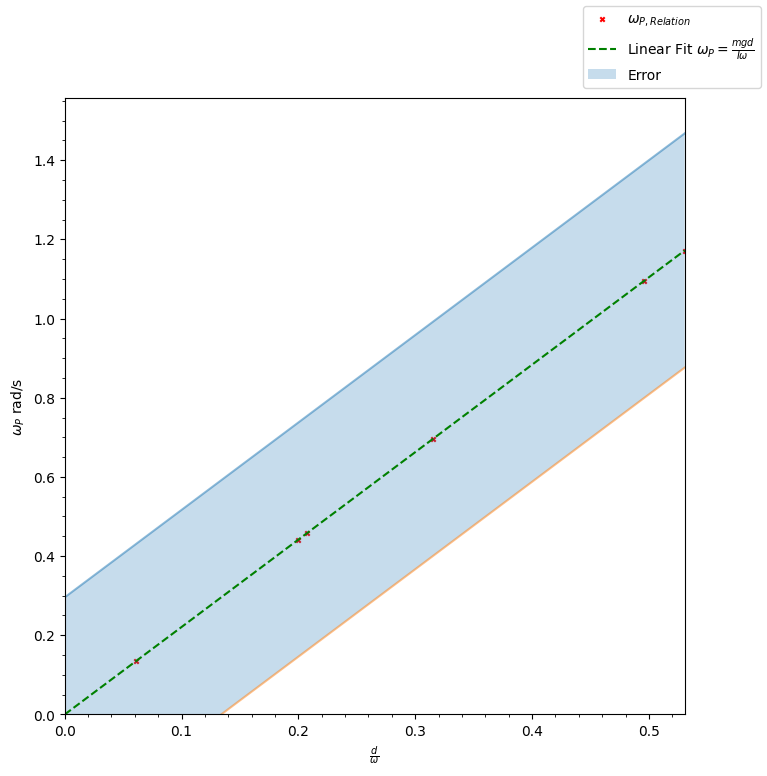

In [134]:
fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(gyro_precession_x_data,relation_angular_precession_frequency_value,label="$\\omega_{P,Relation}$",s=10,marker="x",color="red")
ax.plot(precession_fit_x,precession_linear_fit(precession_fit_x),label="Linear Fit $\\omega_P = \\frac{mgd}{I\\omega}$",ls="dashed",color="green")
#ax.scatter(np.abs(gyro_distances_from_axis)/gyro_rot_angular_frequency,gyro_precession_calculated_freq,label="$\omega_P$ from $\\frac{2\pi}{T_P}$",s=15,marker="+",color="black")
#ax.plot(precession_fit_x,precession_fit_period(precession_fit_x),label="Linear Fit using measured time period", ls="dashed",color="purple")
ax.set_xlabel("$\\frac{d}{\\omega}$ ")
ax.plot(precession_fit_x,precession_linear_fit(precession_fit_x)+gyroscope_precession_freq_error,alpha=0.5)
ax.fill_between(precession_fit_x,precession_linear_fit(precession_fit_x)+gyroscope_precession_freq_error,precession_linear_fit(precession_fit_x)-gyroscope_precession_freq_error,alpha=0.25,label="Error")
ax.plot(precession_fit_x,precession_linear_fit(precession_fit_x)-gyroscope_precession_freq_error,alpha=0.5)
ax.set_ylabel("$\\omega_P$ rad/s")
ax.set_xlim(0,max(gyro_precession_x_data))
ax.set_ylim(0,)
ax.minorticks_on()
fig.legend()
plt.show()

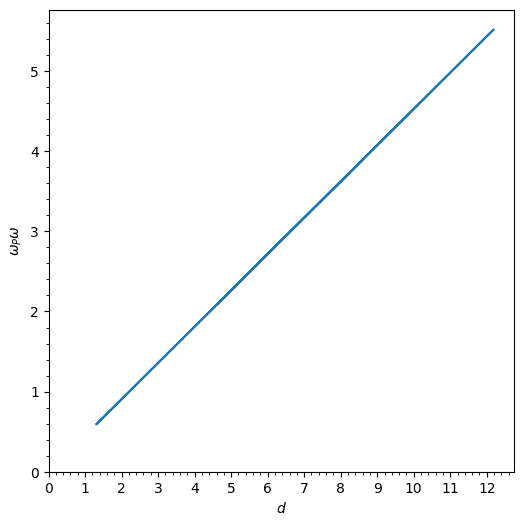

In [135]:
fig,ax = plt.subplots(figsize=(6,6))
ax.plot(relation_angular_precession_frequency_value*gyro_rot_angular_frequency,gyro_distances_from_axis)
ax.set_ylabel("$\\omega_P\\omega$")
ax.set_xlabel("$d$")
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.set_xticks(np.arange(0,13))
ax.minorticks_on()
#ax.set_aspect('scaled')
#fig.gca().set_aspect("equal",adjustable="box")
#fig.legend()
plt.show()


In [136]:
np.mean(precession_linear_fit(np.linspace(0.00000001,0.5,10000))/np.linspace(0.00000001,0.5,10000))

np.float64(2.2082175510822086)

#### Errors in the Calculation:



In [137]:
# Gradient Error Relation

np.sqrt(
    np.sum(
        [
            ((981/Gyroscope_moment_of_inertia)*gyroscope_mass_error)**2,
            ((gyroscope_mass*981/((Gyroscope_moment_of_inertia)**2))*Gyroscope_moment_of_inertia_error)**2
        ]
    )
)

np.float64(0.07013433653914916)

In [138]:
gyro_distances_from_axis

array([3.9 , 2.02, 0.59, 5.52, 2.09, 3.72])

### 3.0 Nutation




The Gyroscope has 18 spokes (equally spaced). Therefore $\Delta t$ is the same as the duration between two spokes, multiplied by 18. Or, the duration elapsed over any 18 spokes.


Relation between 

$\omega$ and $\omega_n$

In [139]:
nutation_time_period_error = 0.001


nutation_rotation_time_periods = np.array([
    np.sum([0.062,0.062,0.064,0.064,0.064,0.066,0.065,0.065,0.065,0.064,0.063,0.063,0.063,0.063,0.063,0.067,0.065,0.064]),
    np.sum([0.047,0.047,0.045,0.045,0.044,0.044,0.044,0.043,0.045,0.045,0.045,0.046,0.046,0.047,0.044,0.044,0.043,0.044]),
    np.sum([0.310,0.305,0.313,0.308,0.320,0.319,0.306,0.297,0.307,0.294,0.296,0.301,0.292,0.331,0.319,0.317,0.310,0.315]),
    np.sum([0.118,0.130,0.124,0.126,0.128,0.122,0.127,0.127,0.129,0.132,0.129,0.124,0.122,0.122,0.119,0.123,0.122,0.125]),
    np.sum([0.033,0.034,0.033,0.033,0.035,0.034,0.035,0.033,0.033,0.032,0.033,0.033,0.033,0.034,0.034,0.034,0.035,0.034])
])

nutation_nutation_time_periods = np.array([0.78,0.56,3.59,1.53,0.37])
nutation_nutation_time_period_error = np.array(pd.DataFrame(nutation_nutation_time_periods).sem())

nutation_rotation_angular_frequency = angular_freq(nutation_rotation_time_periods)

nutation_nutation_angular_frequency = angular_freq(nutation_nutation_time_periods)

## Fit Data

In [140]:
nutation_fit_coeff = np.polynomial.polynomial.polyfit(nutation_rotation_angular_frequency,nutation_nutation_angular_frequency,1)
nutation_fit = np.polynomial.polynomial.Polynomial(nutation_fit_coeff)

nutation_fit_x = np.linspace(0,max(nutation_rotation_angular_frequency),10000)

In [141]:
nutation_rot_ang_freq_err = np.array(pd.DataFrame(np.sqrt(
    ((2*np.pi/(nutation_rotation_time_periods**2))*0.001)**2
)).sem())
print(f"{nutation_rot_ang_freq_err = }")


nutation_nutation_ang_freq_err = np.array(pd.DataFrame(
    np.sqrt(
        ((2*np.pi/((nutation_nutation_time_periods)**2))*nutation_nutation_time_period_error)**2
    )
).sem()
)

print(f"{nutation_nutation_ang_freq_err = }")

nutation_rot_ang_freq_err = array([0.00311359])
nutation_nutation_ang_freq_err = array([4.86414418])


In [142]:
-nutation_nutation_ang_freq_err

array([-4.86414418])

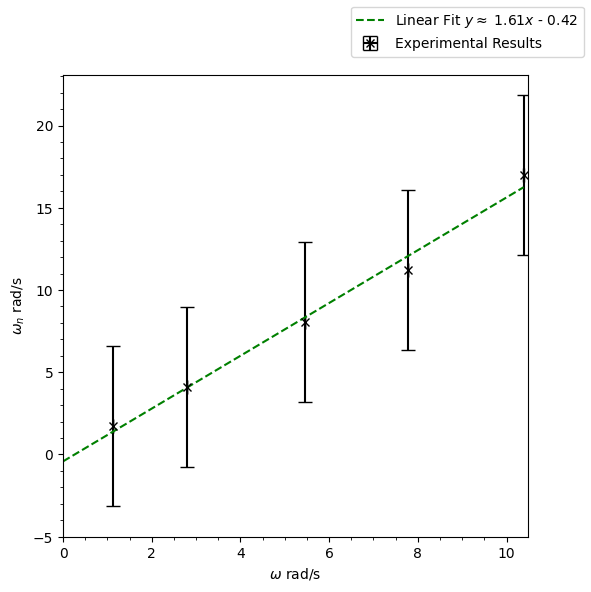

In [143]:
fig, ax = plt.subplots(figsize=(6,6))
ax.errorbar(x=nutation_rotation_angular_frequency,y=nutation_nutation_angular_frequency,xerr=nutation_rot_ang_freq_err, yerr=nutation_nutation_ang_freq_err,label="Experimental Results",marker="x",color="black",ls="none",capsize=5)
#ax.fill_between(nutation_fit_x,nutation_fit(nutation_fit_x)+nutation_nutation_ang_freq_err,nutation_fit(nutation_fit_x)-nutation_nutation_ang_freq_err,alpha=0.5)
ax.plot(nutation_fit_x,nutation_fit(nutation_fit_x),ls="dashed",color="green",label=f"Linear Fit $y \\approx $ {nutation_fit_coeff[1]:.2f}$x$ - {np.abs(nutation_fit_coeff[0]):.2f}")
ax.set_ylabel("$\\omega_n$ rad/s")
ax.set_xlabel("$\\omega$ rad/s")
ax.set_xlim(0,max(nutation_rotation_angular_frequency)+0.1)
ax.set_ylim(-5,)
#ax.set_yticks(np.arange(-5,25,1))
ax.minorticks_on()
fig.legend()
plt.show()